# `Is_Holiday` Problem
Intuitionally, We suppose that if it is a holiday week, then the consumption will increse.
*But* in our first correlation coefficience analysis, the correlation coefficience value between `Is_Holiday` to `Weekly_Sales` __has not a strong correlation__.  

Why do these things happen? Each dataframe splited by `Store` gives some answers.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def modify_date(date):
    day = date[:2]
    month = date[3:5]
    year = date[6:]
    return year + month + day


train = pd.read_csv("../dataset/train.csv")
train["Date"] = train["Date"].apply(modify_date)
train["IsHoliday"] = train["IsHoliday"].apply(int)

dummy = train[train["IsHoliday"] == 1][["Date"]].reset_index(drop=1)

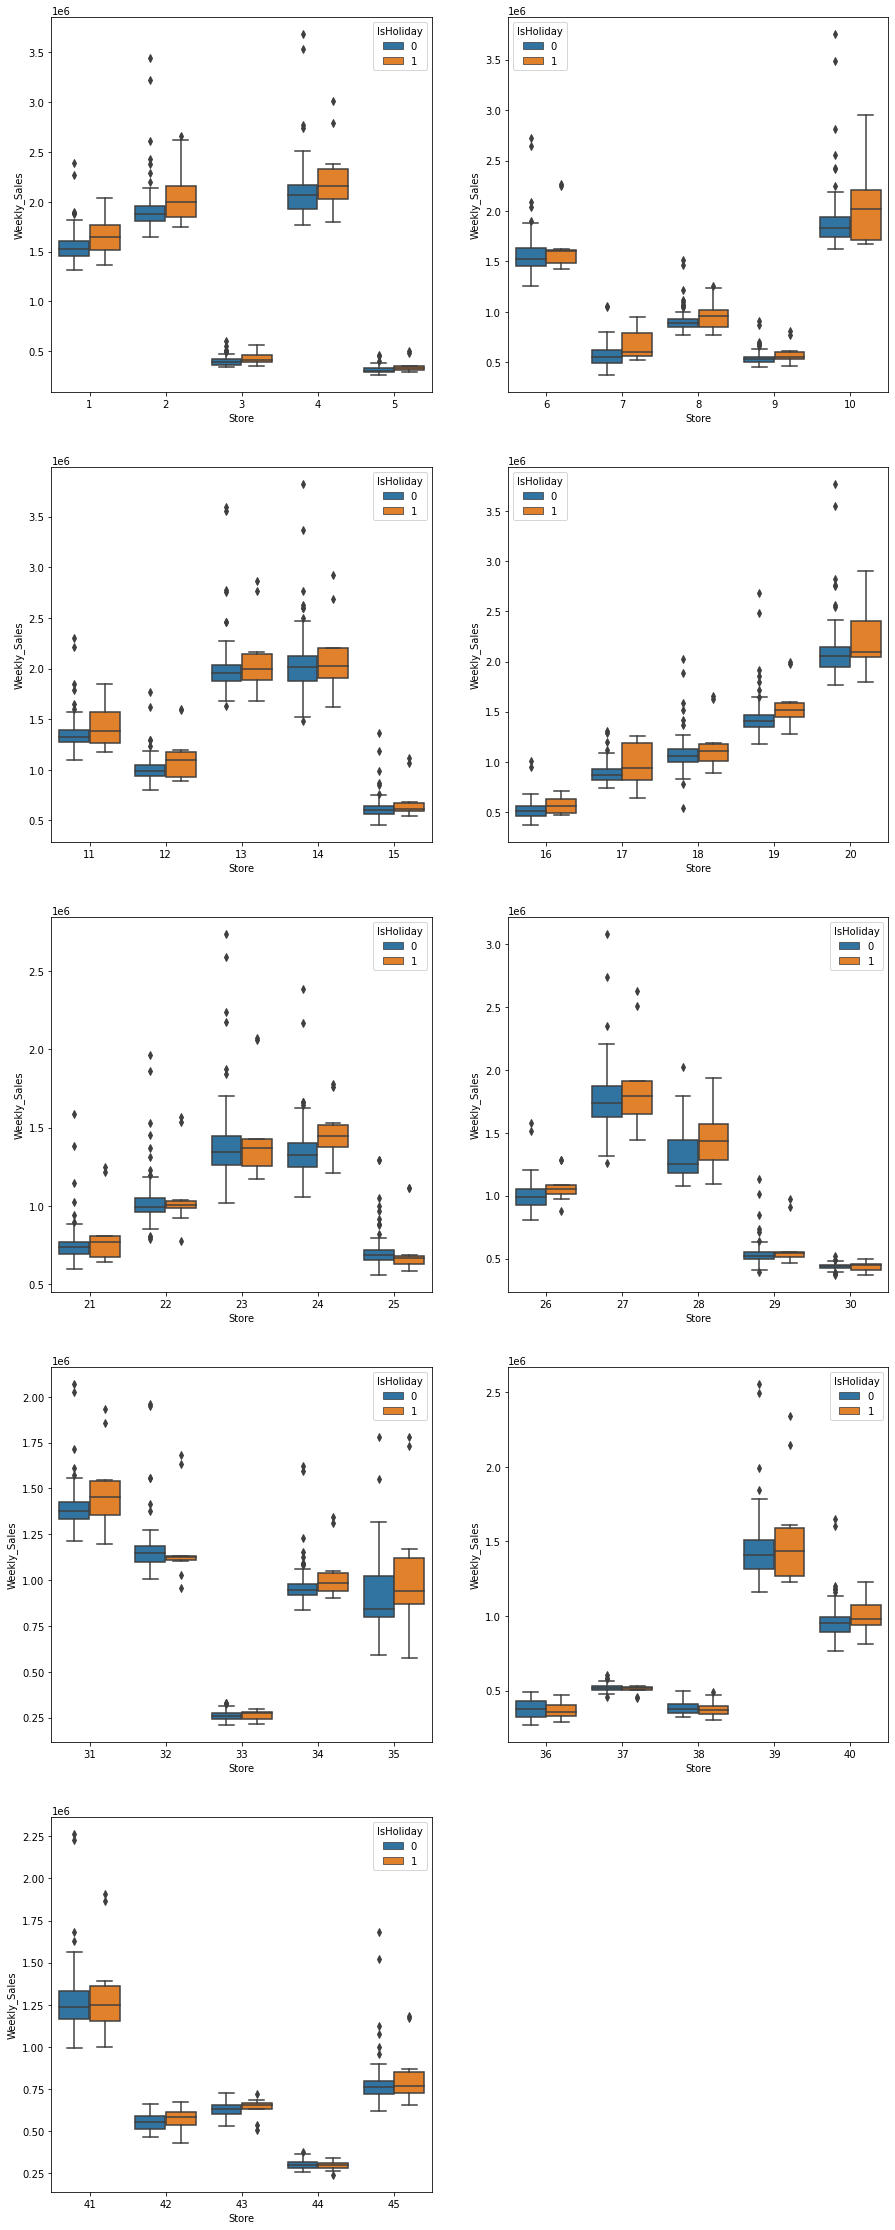

In [2]:
# Split train.csv
splited = []
for k in range(9):
    t = train[(5*k < train["Store"]) & (train["Store"] <= 5*(k+1))]
    splited.append(t)

plt.figure(figsize=(15, 40))
for i, t in enumerate(splited, 1):
    plt.subplot(5, 2, i)
    sns.boxplot(x="Store", y="Weekly_Sales", hue="IsHoliday", data=t)

In [3]:
# ROC is rate of change.
analysis = pd.DataFrame()

for store in range(1, 46):
    t = train[train["Store"] == store]    
    correlation = t.corr()["IsHoliday"].loc["Weekly_Sales"].round(2)
    
    # Mean
    mean_true = t[t["IsHoliday"] == 1]["Weekly_Sales"].mean()
    mean_false = t[t["IsHoliday"] == 0]["Weekly_Sales"].mean()
    mean_gap = mean_true - mean_false
    mean_roc = mean_gap / mean_false * 100
    
    # Median
    median_true = t[t["IsHoliday"] == 1]["Weekly_Sales"].median()
    median_false = t[t["IsHoliday"] == 0]["Weekly_Sales"].median()
    median_gap = median_true - median_false
    median_roc = median_gap / median_false * 100
    
    # Concatenate `tmp` with `analysis`
    tmp = pd.DataFrame(
        {"Store":[store], "Corr":[correlation], \
        "Mean(T)":[round(mean_true, 2)], "Mean(F)":[round(mean_false, 2)], \
        "Mean Gap":[round(mean_gap, 2)], "Mean ROC":[round(mean_roc, 2)], \
        "Median(T)":[round(median_true, 2)], "Median(F)":[round(median_false, 2)], \
        "Median Gap":[round(median_gap, 2)], "Median ROC":[round(median_roc, 2)]
        }
    )
    analysis = pd.concat([analysis, tmp])

# analysis.sort_values("Corr", ascending=False).reset_index(drop=1)
forsave = analysis.reset_index(drop=1)
analysis.to_csv("../dataset/roc.csv", index=False)